In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import easydarkfigs
%matplotlib inline

In [2]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

# Load Data

In [3]:
dmods = {
    'NGC3377': 30.18,
    'NGC4993': 33.05,
    'M87': 31.02,
    'M49': 31.0
}

In [4]:
regions = {
    'NGC3377': 126,
    'NGC4993': 70,
    'M87': 118,
    'M49': 183
}

In [5]:
colors = {
    'NGC3377': 'z_gz',
    'NGC4993': 'z_gz',
    'M49': 'z_gz',
    'M87': 'I_VI'
}

In [6]:
data = {}
for gal, reg in regions.items():
    data[gal] = np.loadtxt(f'../data/{gal}/pcmds/{gal}_{colors[gal]}_{reg}.pcmd', unpack=True)

In [7]:
models = {}
models[0] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(dust_frac=1.0),
    ppy.sfhmodels.TauModel(),
    ppy.distancemodels.FixedDistance(30.),
)

models[1] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(dust_frac=1.0),
    ppy.sfhmodels.TauModel(),
    ppy.distancemodels.VariableDistance(),
)

models[2] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(dust_frac=1.0),
    ppy.sfhmodels.NonParam(),
    ppy.distancemodels.VariableDistance(),
)

In [8]:
res = {}
pcmds = {}
for gal in ['NGC3377', 'NGC4993', 'M87', 'M49']:
    r = regions[gal]
    for m in [0,1,2]:
        k = f'{gal}_m{m}_r{r}'
        res[k] = ppy.results.ResultsPlotter(f'results/{gal}_m{m}_r{r}.csv', live_file=f'results/{gal}_m{m}_r{r}_live.csv', gal_model=models[m],
                                                            run_name=f'{gal} Region {r}, Model {m}')
        try:
            pcmds[k] = np.loadtxt(f'results/{gal}_m{m}_r{r}.pcmd', unpack=True)
        except:
            pass

In [9]:
for k in res.keys():
    print(k, res[k].as_dynesty()['delta_logz'][-1])

NGC3377_m0_r126 8.591585810791003e-06
NGC3377_m1_r126 3.2433375736218295e-06
NGC3377_m2_r126 1.097271725695066
NGC4993_m0_r70 7.779316274536541e-05
NGC4993_m1_r70 5.3599649163516006e-06
NGC4993_m2_r70 3.4942827244840373
M87_m0_r118 0.00012145718427802876
M87_m1_r118 0.009731294929125056
M87_m2_r118 1.0973698268152887
M49_m0_r183 9.87029524708305e-05
M49_m1_r183 0.0066645247007670605
M49_m2_r183 1.0983198560050482


# NGC 3377

In [10]:
gal = 'NGC3377'


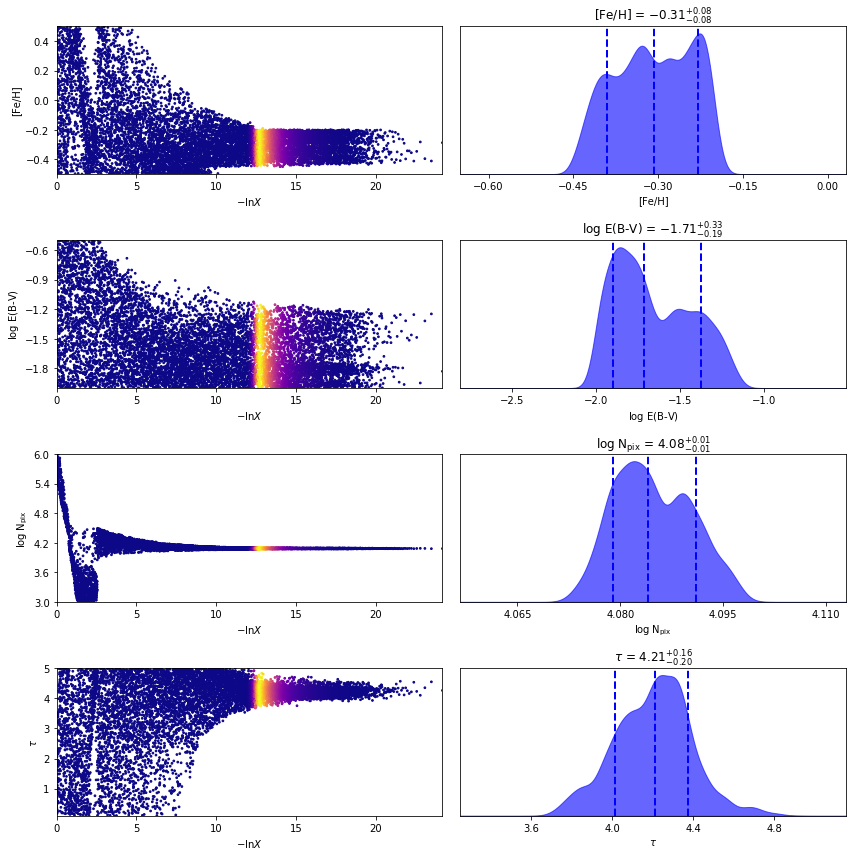

In [11]:
gal = 'NGC3377'
fig, axes = res[f'{gal}_m0_r{regions[gal]}'].plot_trace();
plt.tight_layout()

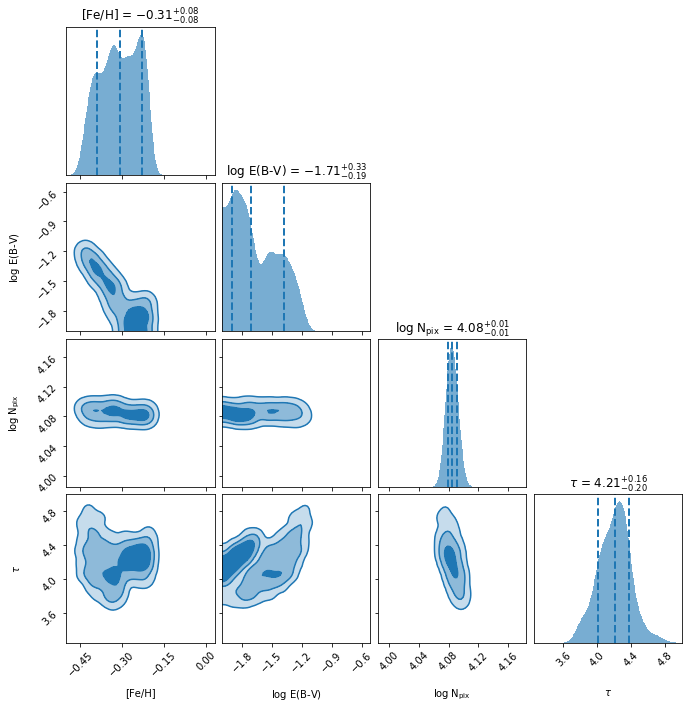

In [60]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'NGC3377'
k = f'{gal}_m0_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)

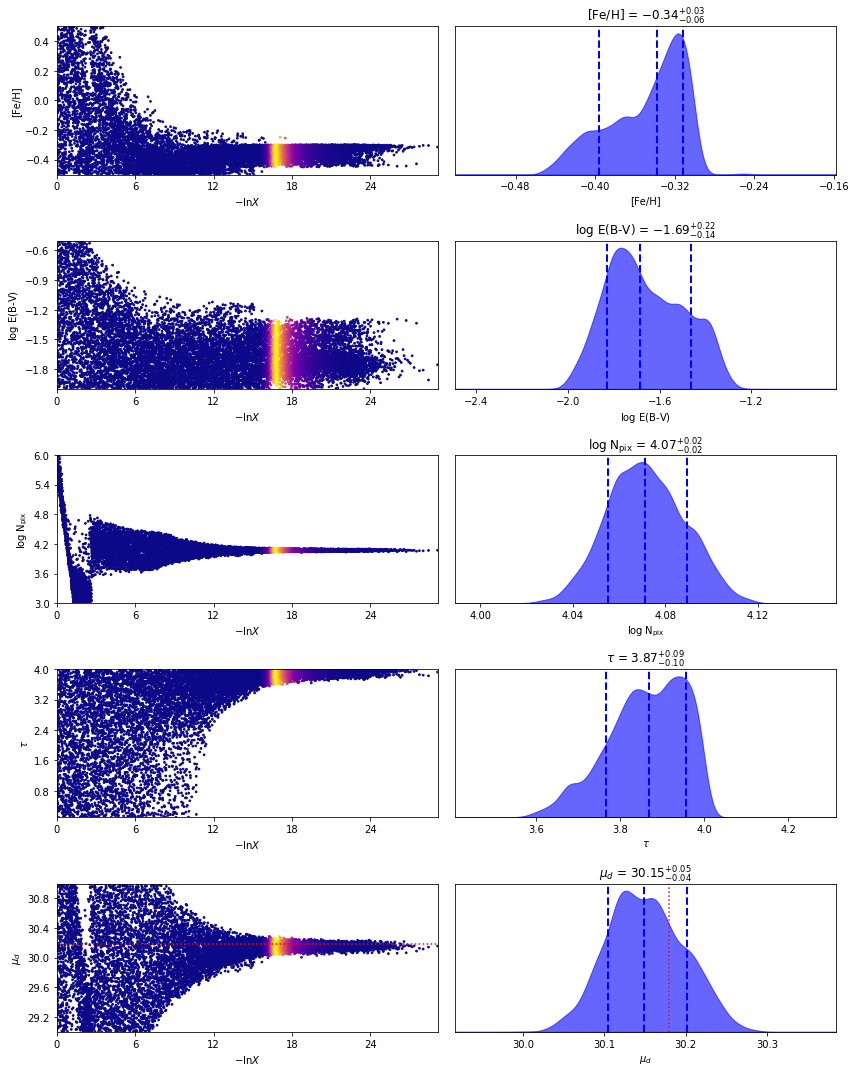

In [61]:
gal = 'NGC3377'
fig, axes = res[f'{gal}_m1_r{regions[gal]}'].plot_trace();
axes[-1,0].axhline(y=dmods[gal], color='r', ls=':')
axes[-1,1].axvline(x=dmods[gal], color='r', ls=':')
plt.tight_layout()

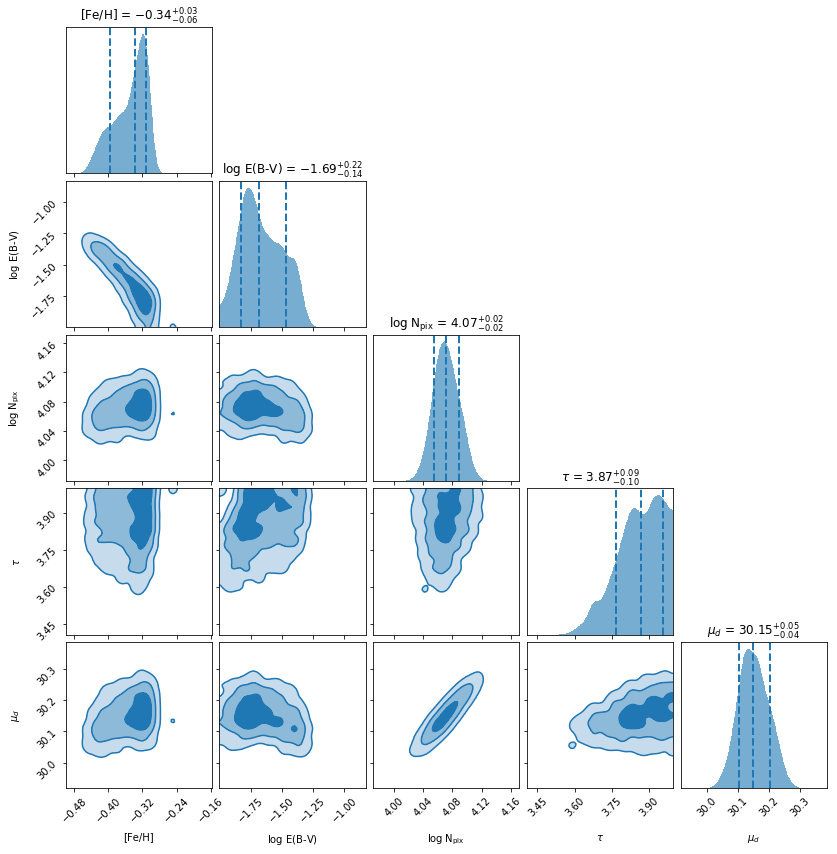

In [62]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'NGC3377'
k = f'{gal}_m1_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(12, 12))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)

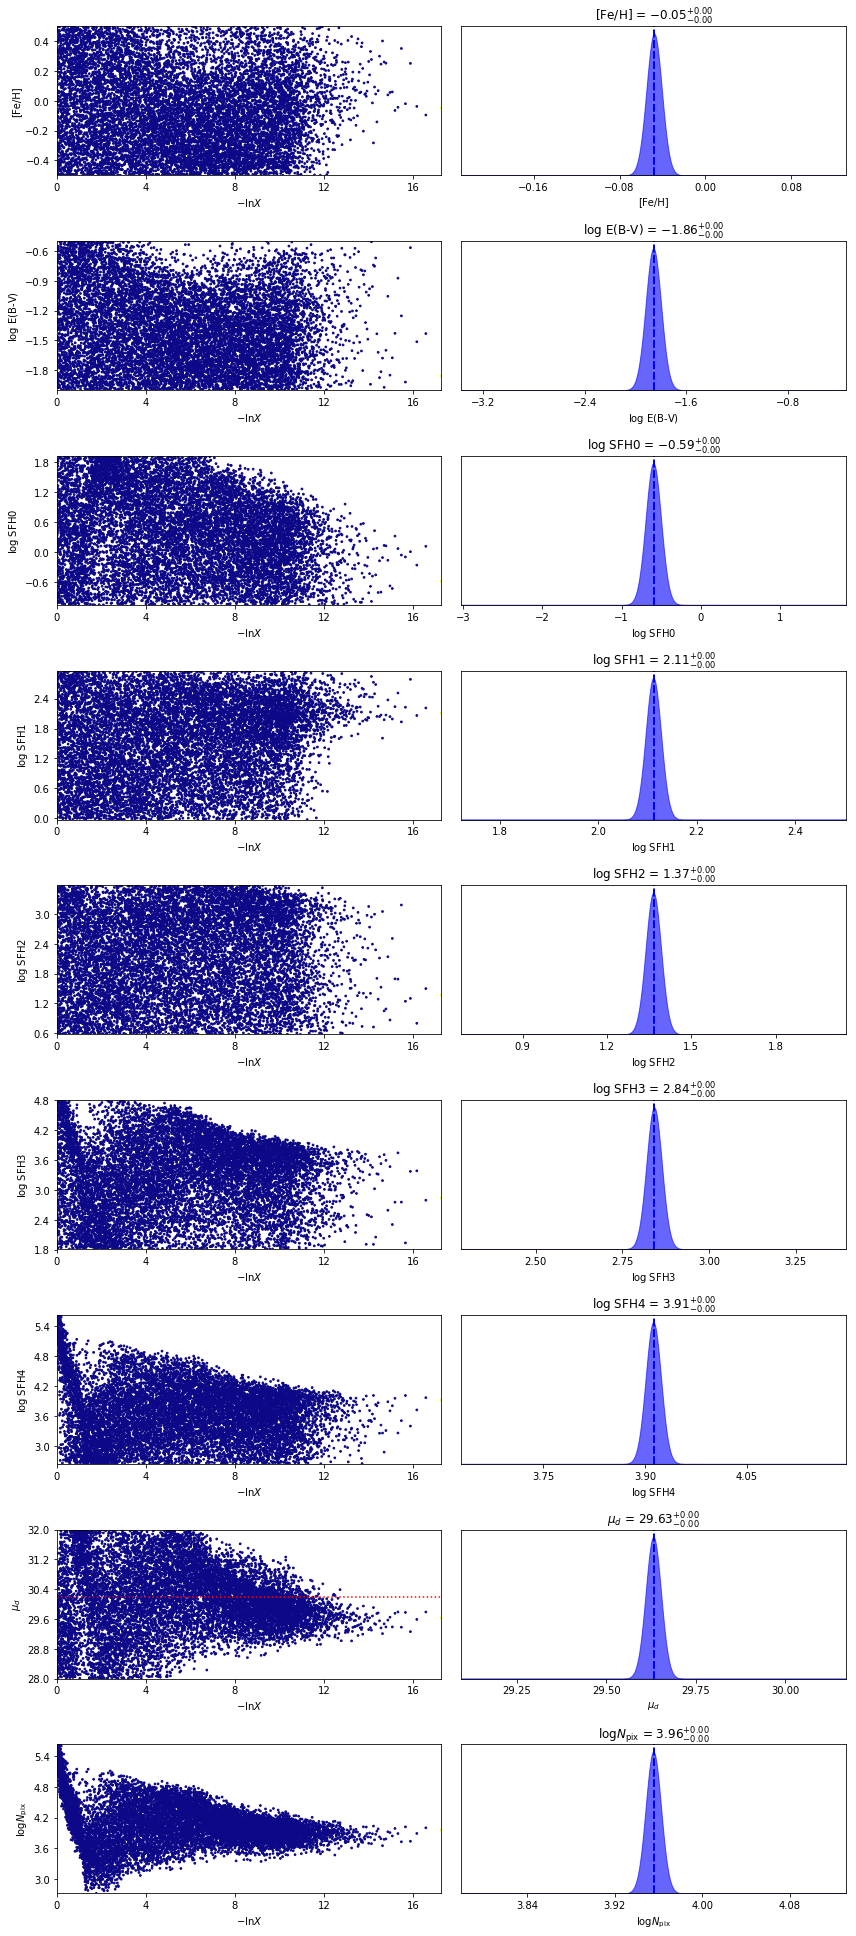

In [63]:
gal = 'NGC3377'
fig, axes = res[f'{gal}_m2_r{regions[gal]}'].plot_trace();
axes[-2,0].axhline(y=dmods[gal], color='r', ls=':')
axes[-2,1].axvline(x=dmods[gal], color='r', ls=':')
plt.tight_layout()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

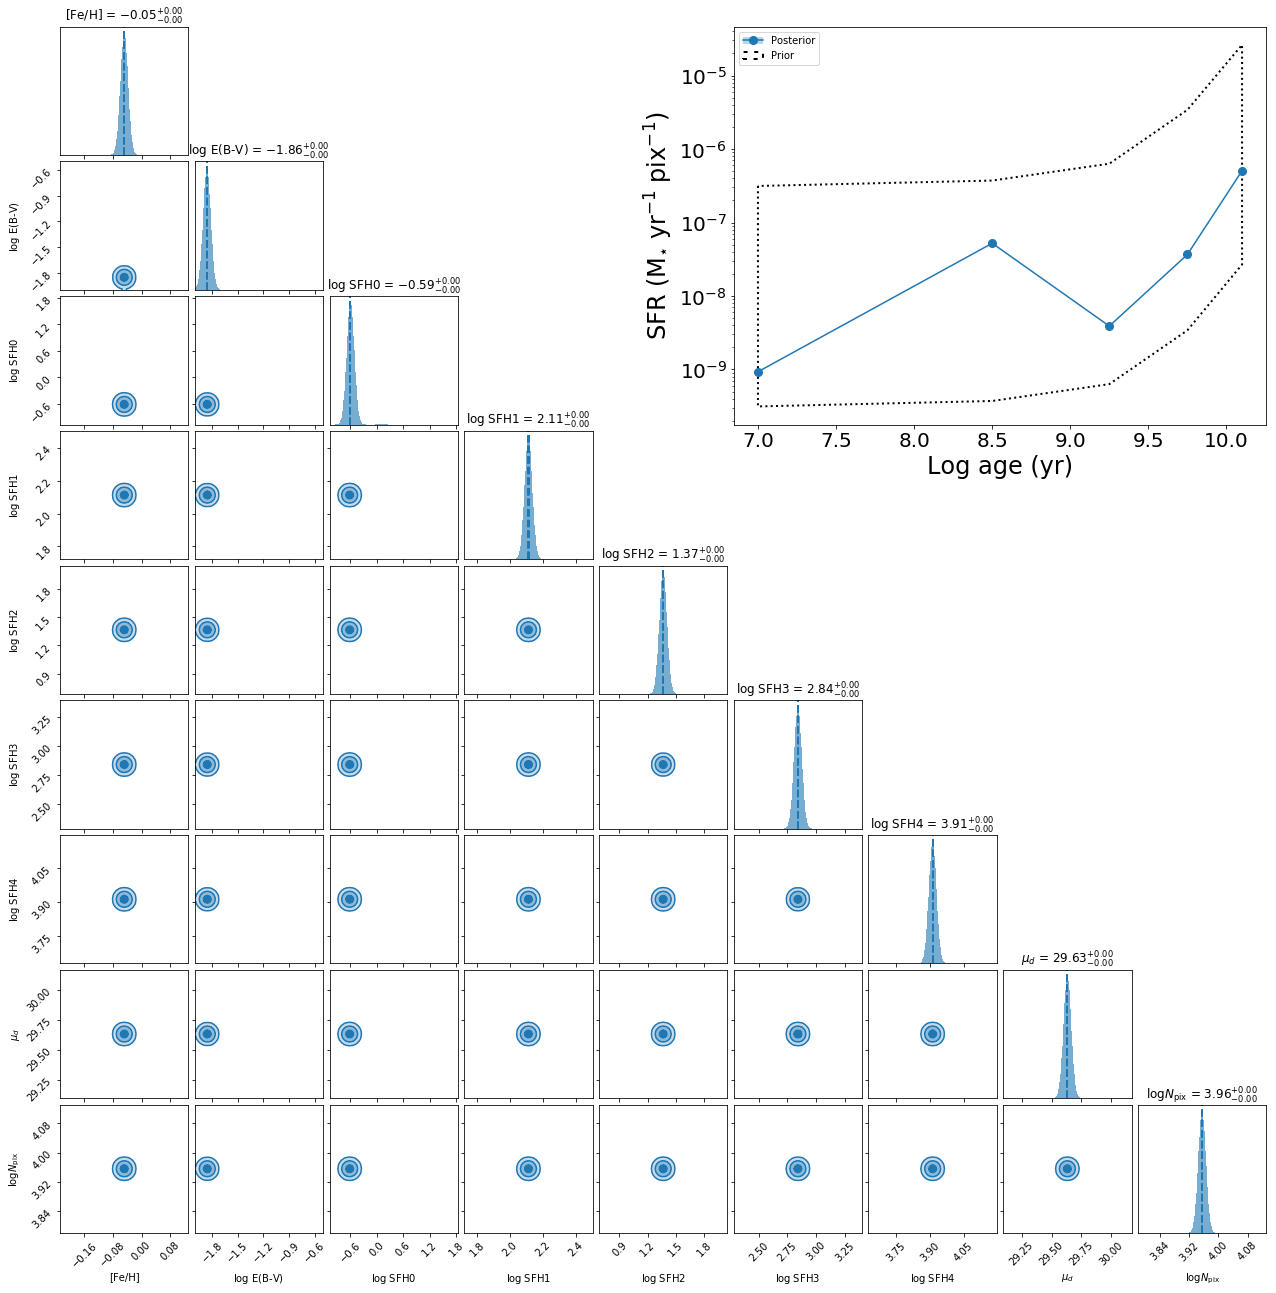

In [64]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'NGC3377'
k = f'{gal}_m2_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=24)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=24)
plt.setp(axbig.get_xticklabels(), fontsize=20)
plt.setp(axbig.get_yticklabels(), fontsize=20)

In [40]:
f = ppy.instrument.default_ngc3377_filters()
iso_model_NGC3377 = ppy.isochrones.Isochrone_Model(f)

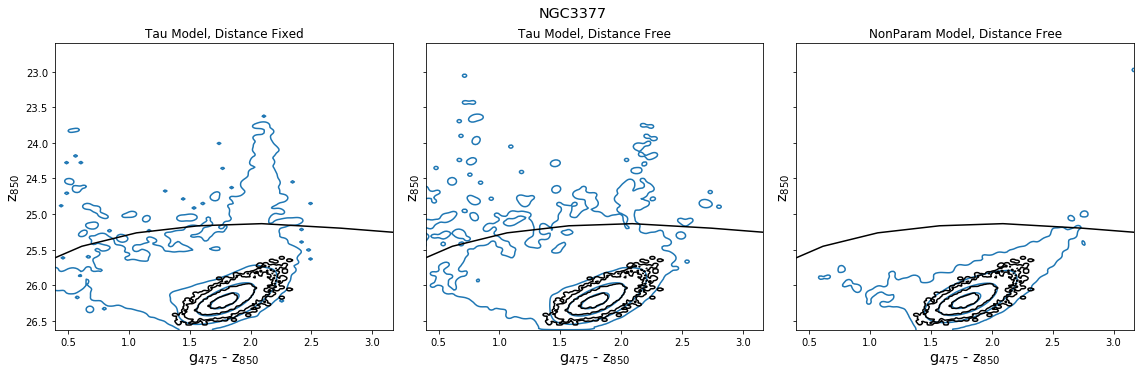

In [41]:
gal = 'NGC3377'
fig, axes = plt.subplots(ncols=3, figsize=(16, 5), sharex=True, sharey=True)
for i in range(3):
    k = f'{gal}_m{i}_r{regions[gal]}'
    ppy.plotting.plot_pcmd_contours(pcmds[k], ax=axes[i])
for a in axes:
    ppy.plotting.plot_pcmd_contours(data[gal], ax=a, keep_limits=True, color='k')
    ppy.plotting.plot_isochrone(iso_model_NGC3377, dmod=dmods[gal], axes=a)
axes[0].set_title('Tau Model, Distance Fixed')
axes[1].set_title('Tau Model, Distance Free')
axes[2].set_title('NonParam Model, Distance Free')
fig.suptitle(gal, y=0.99, fontsize='x-large', verticalalignment='bottom')
plt.tight_layout()

# NGC 4993

In [14]:
gal = 'NGC4993'

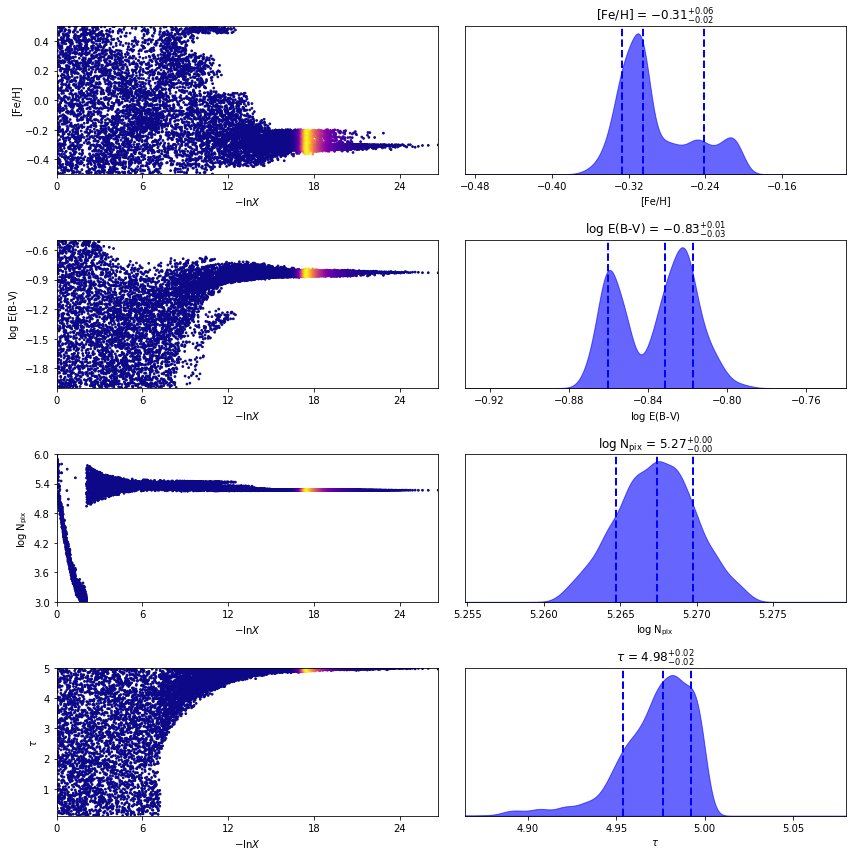

In [15]:
gal = 'NGC4993'
fig, axes = res[f'{gal}_m0_r{regions[gal]}'].plot_trace();
plt.tight_layout()

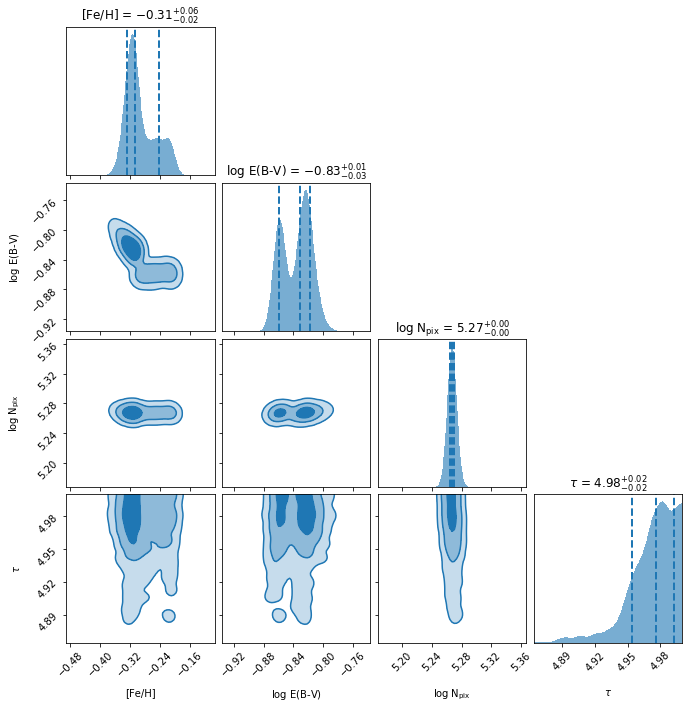

In [65]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'NGC4993'
k = f'{gal}_m0_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)

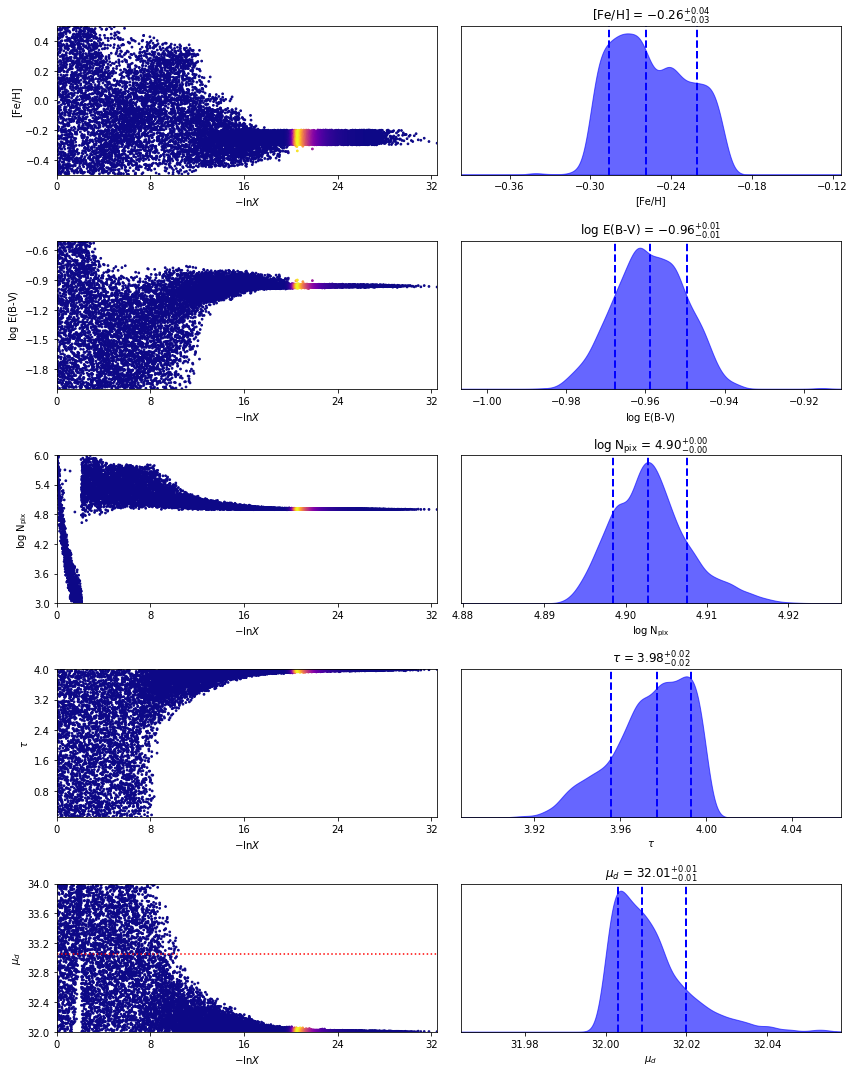

In [16]:
gal = 'NGC4993'
fig, axes = res[f'{gal}_m1_r{regions[gal]}'].plot_trace();
axes[-1,0].axhline(y=dmods[gal], color='r', ls=':')
axes[-1,1].axvline(x=dmods[gal], color='r', ls=':')
plt.tight_layout()

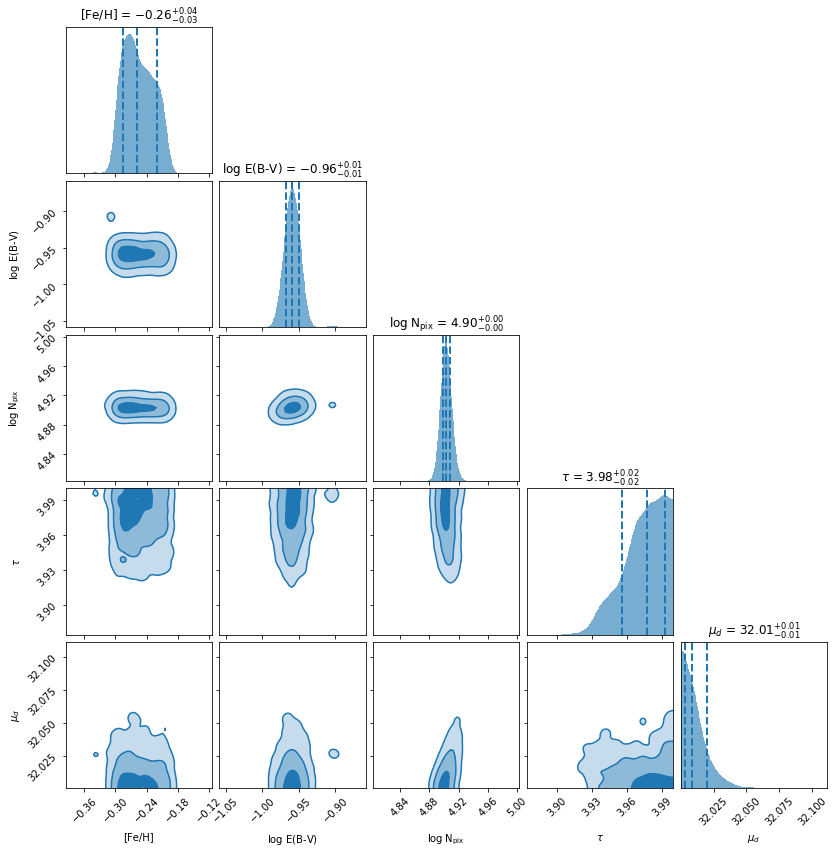

In [66]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'NGC4993'
k = f'{gal}_m1_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(12, 12))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)

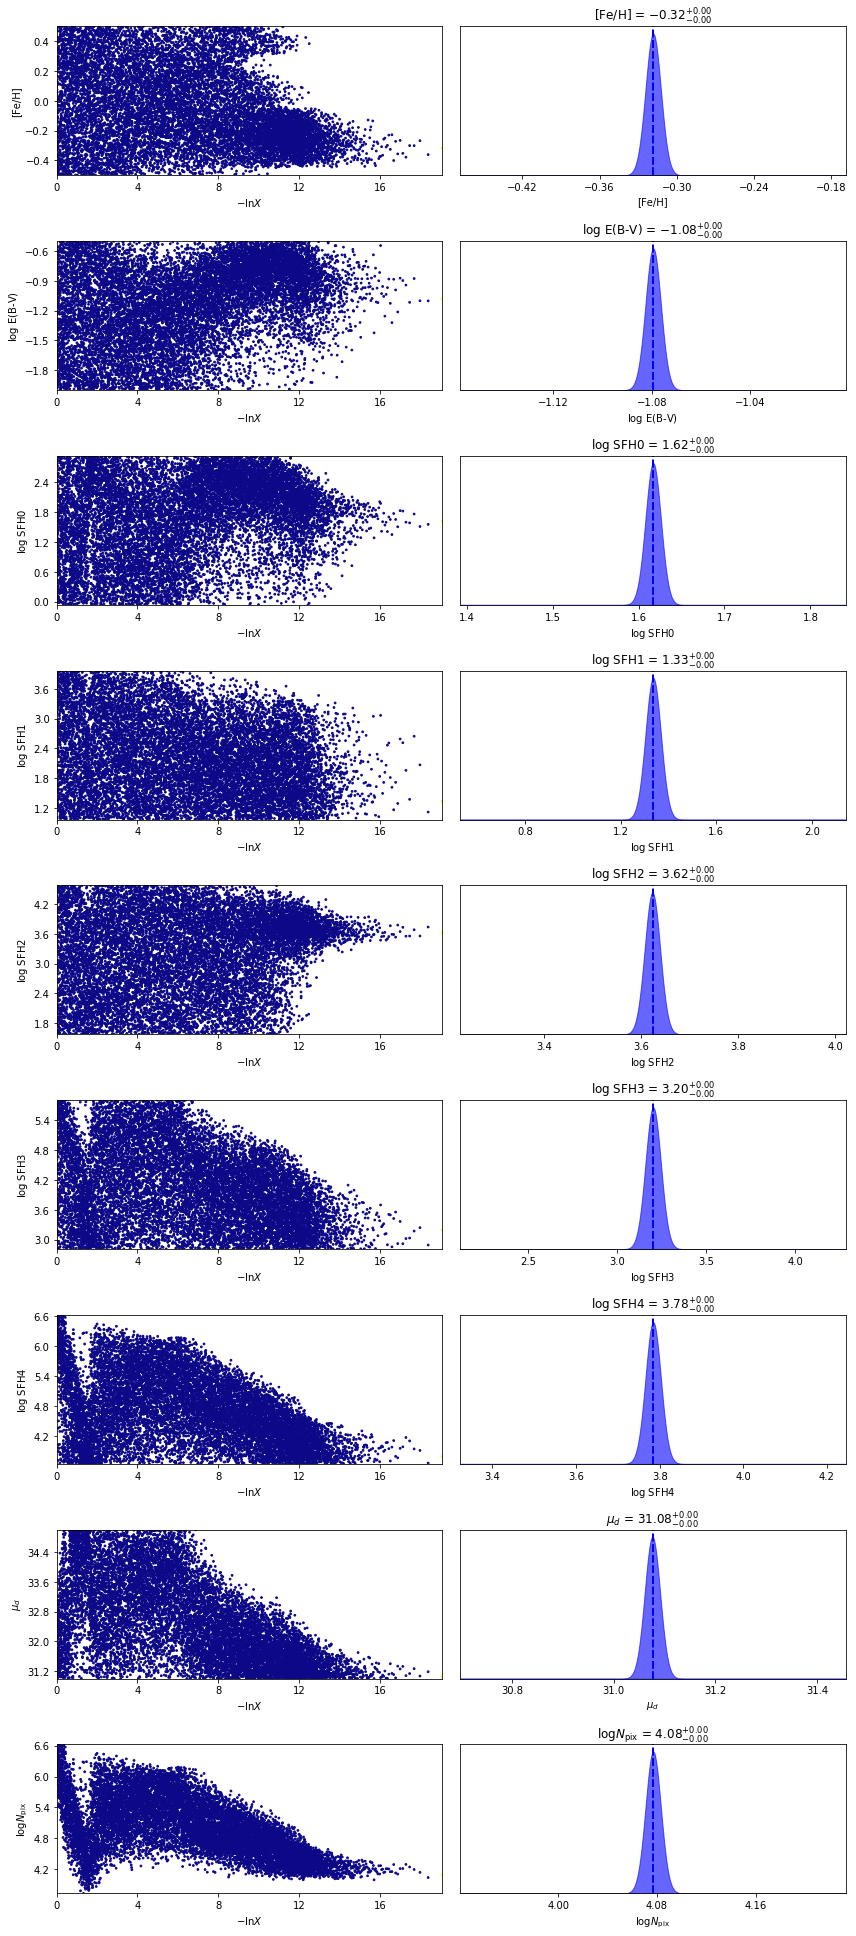

In [17]:
gal = 'NGC4993'
fig, axes = res[f'{gal}_m2_r{regions[gal]}'].plot_trace();
axes[-1,0].axhline(y=dmods[gal], color='r', ls=':')
axes[-1,1].axvline(x=dmods[gal], color='r', ls=':')
plt.tight_layout()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

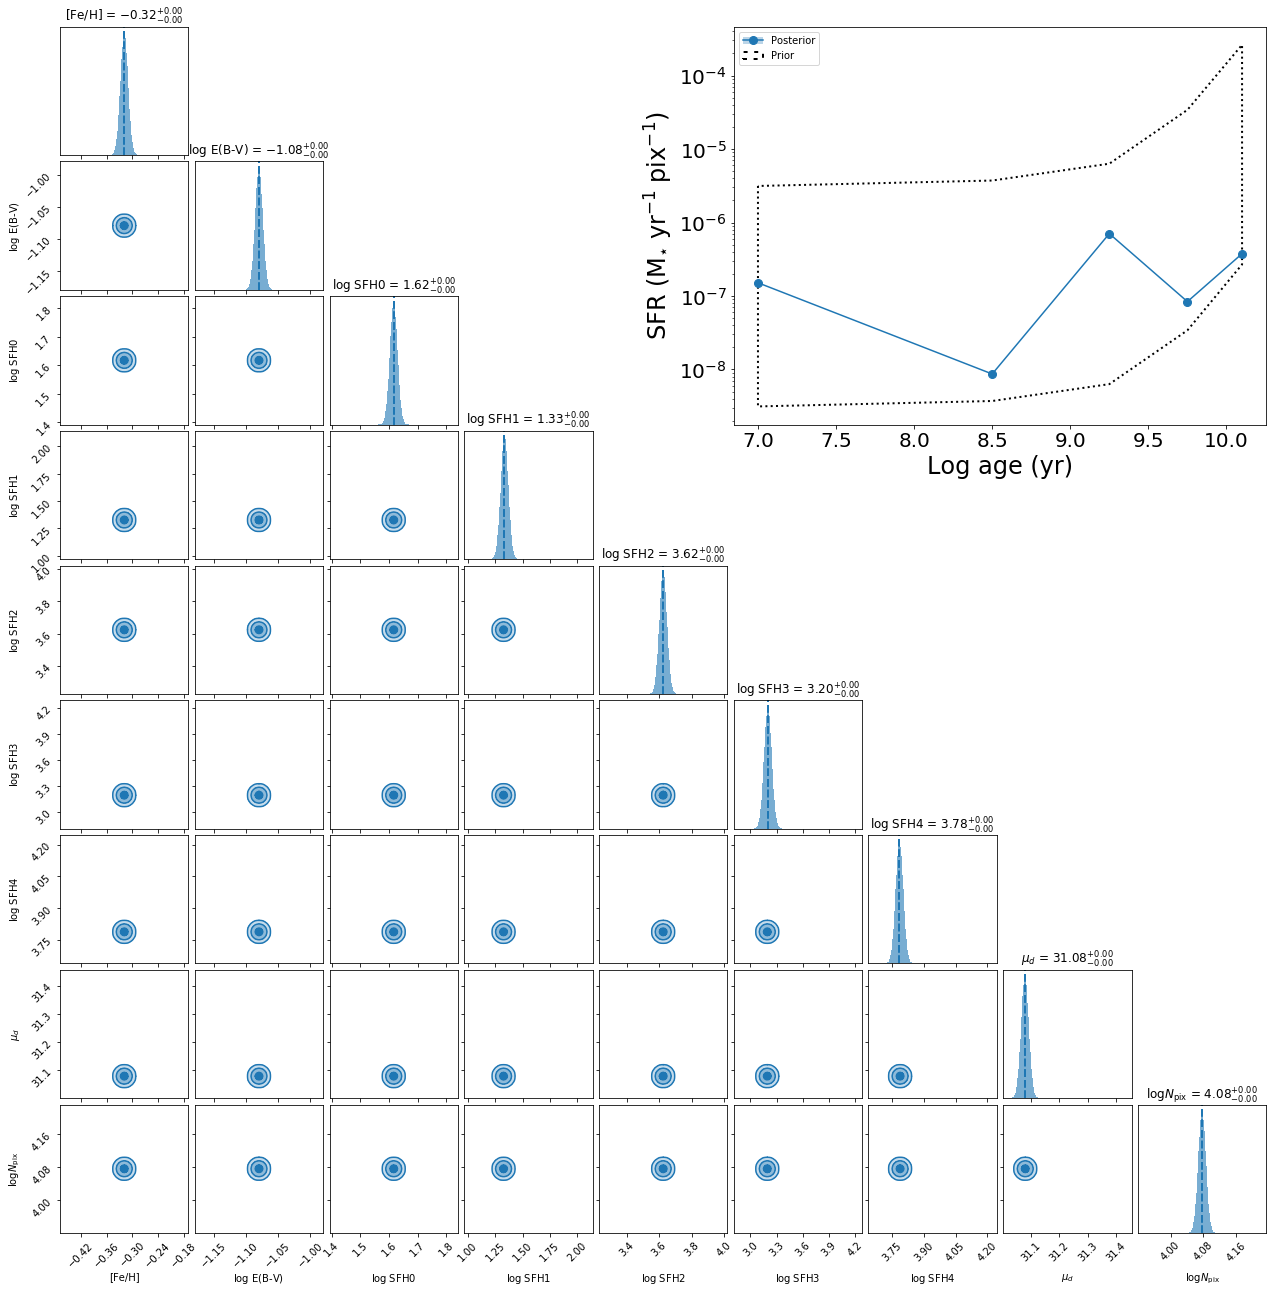

In [54]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'NGC4993'
k = f'{gal}_m2_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=24)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=24)
plt.setp(axbig.get_xticklabels(), fontsize=20)
plt.setp(axbig.get_yticklabels(), fontsize=20)

In [50]:
f = ppy.instrument.default_ngc4993_filters()
iso_model_NGC4993 = ppy.isochrones.Isochrone_Model(f)

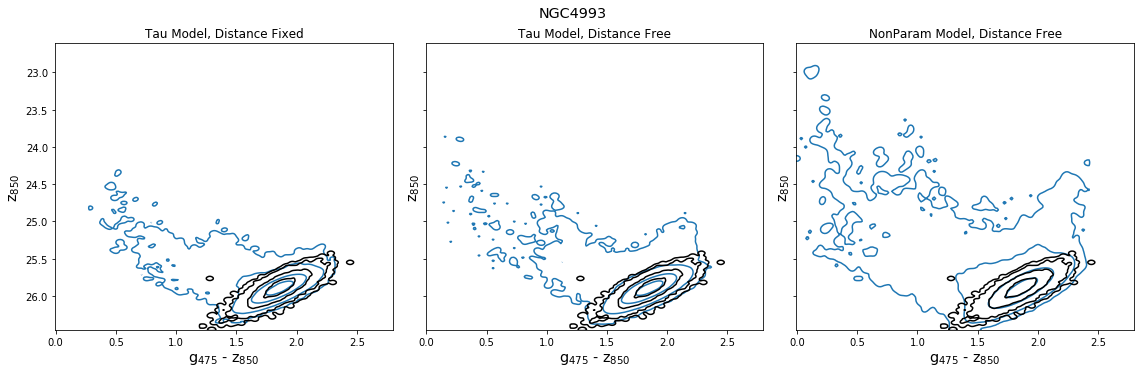

In [51]:
gal = 'NGC4993'
fig, axes = plt.subplots(ncols=3, figsize=(16, 5), sharex=True, sharey=True)
for i in range(3):
    k = f'{gal}_m{i}_r{regions[gal]}'
    ppy.plotting.plot_pcmd_contours(pcmds[k], ax=axes[i])
for a in axes:
    ppy.plotting.plot_pcmd_contours(data[gal], ax=a, keep_limits=True, color='k')
    ppy.plotting.plot_isochrone(iso_model_NGC4993, dmod=dmods[gal], axes=a)
axes[0].set_title('Tau Model, Distance Fixed')
axes[1].set_title('Tau Model, Distance Free')
axes[2].set_title('NonParam Model, Distance Free')
fig.suptitle(gal, y=0.99, fontsize='x-large', verticalalignment='bottom')
plt.tight_layout()

# M87

In [18]:
gal = 'M87'

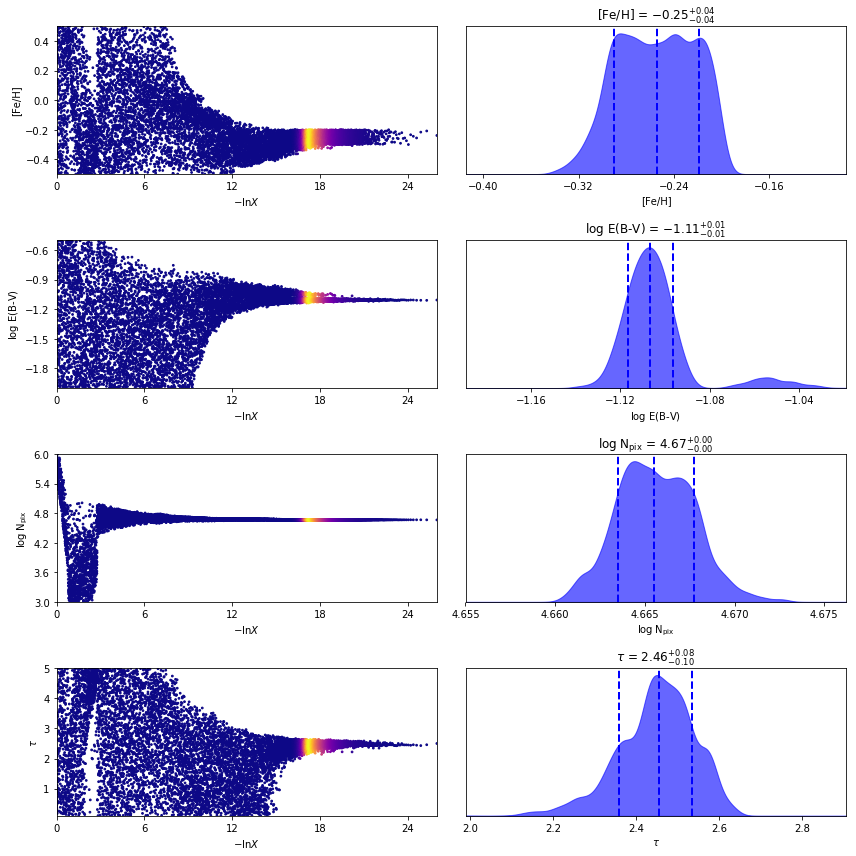

In [19]:
gal = 'M87'
fig, axes = res[f'{gal}_m0_r{regions[gal]}'].plot_trace();
plt.tight_layout()

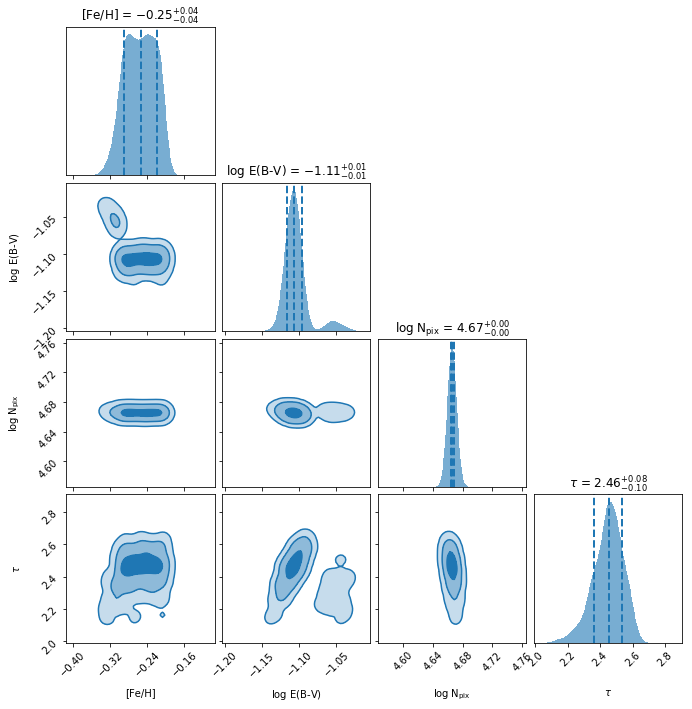

In [68]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'M87'
k = f'{gal}_m0_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)

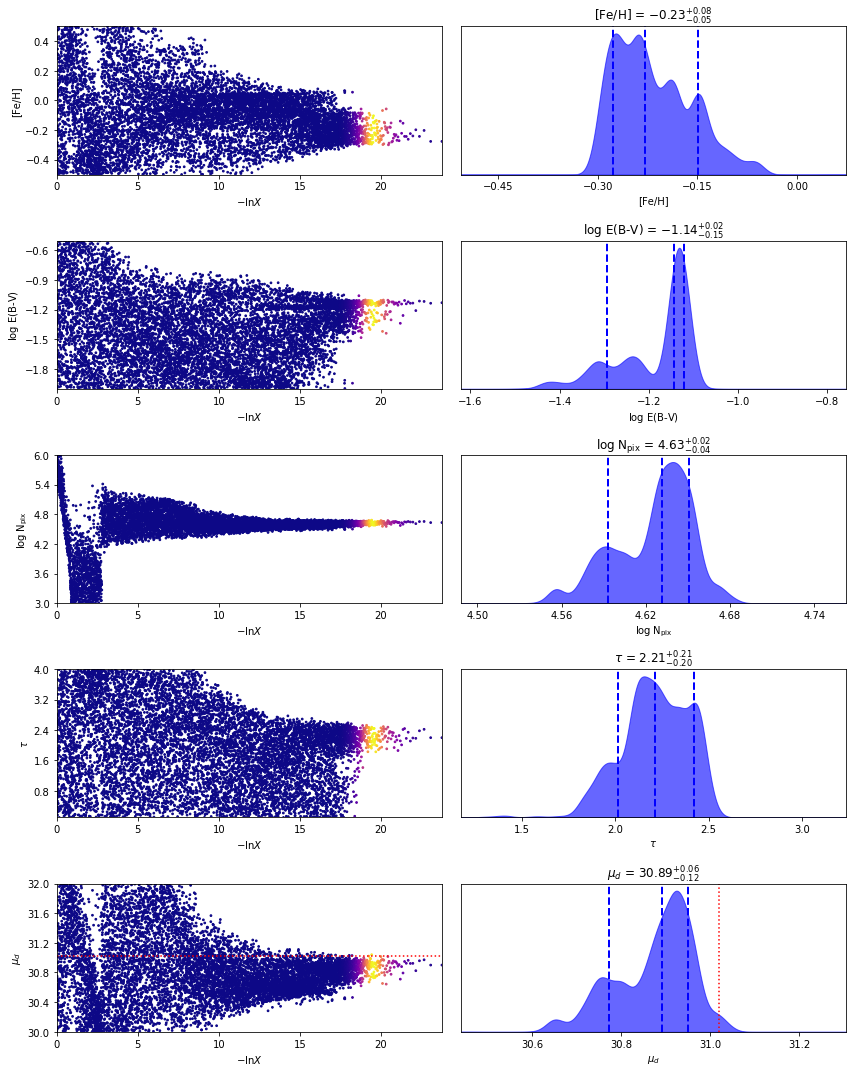

In [20]:
gal = 'M87'
fig, axes = res[f'{gal}_m1_r{regions[gal]}'].plot_trace();
axes[-1,0].axhline(y=dmods[gal], color='r', ls=':')
axes[-1,1].axvline(x=dmods[gal], color='r', ls=':')
plt.tight_layout()

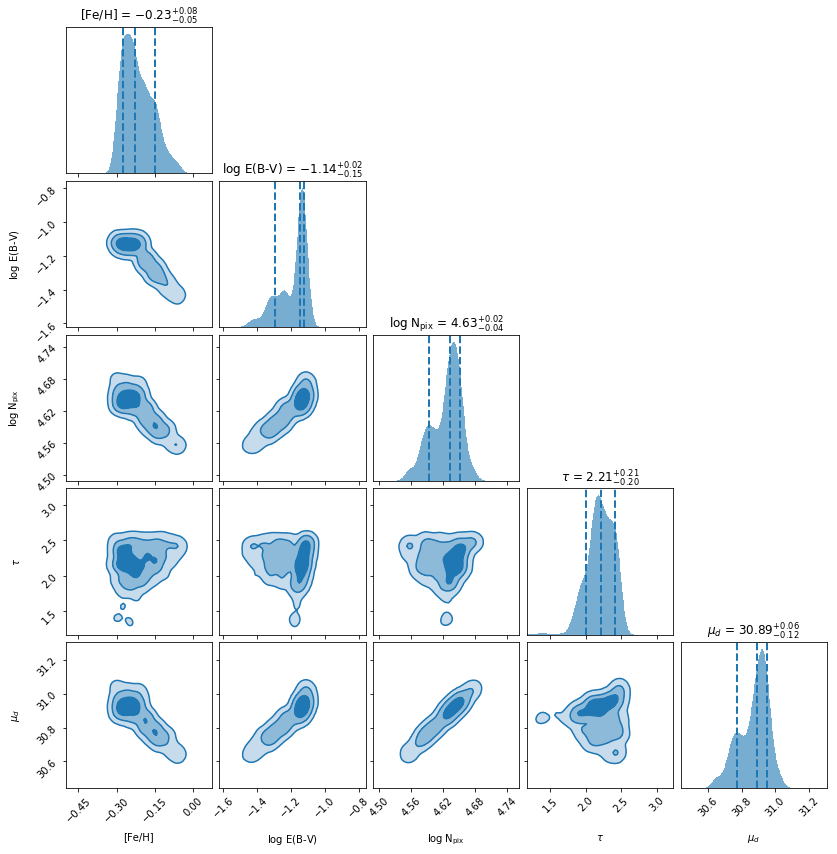

In [69]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'M87'
k = f'{gal}_m1_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(12, 12))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)

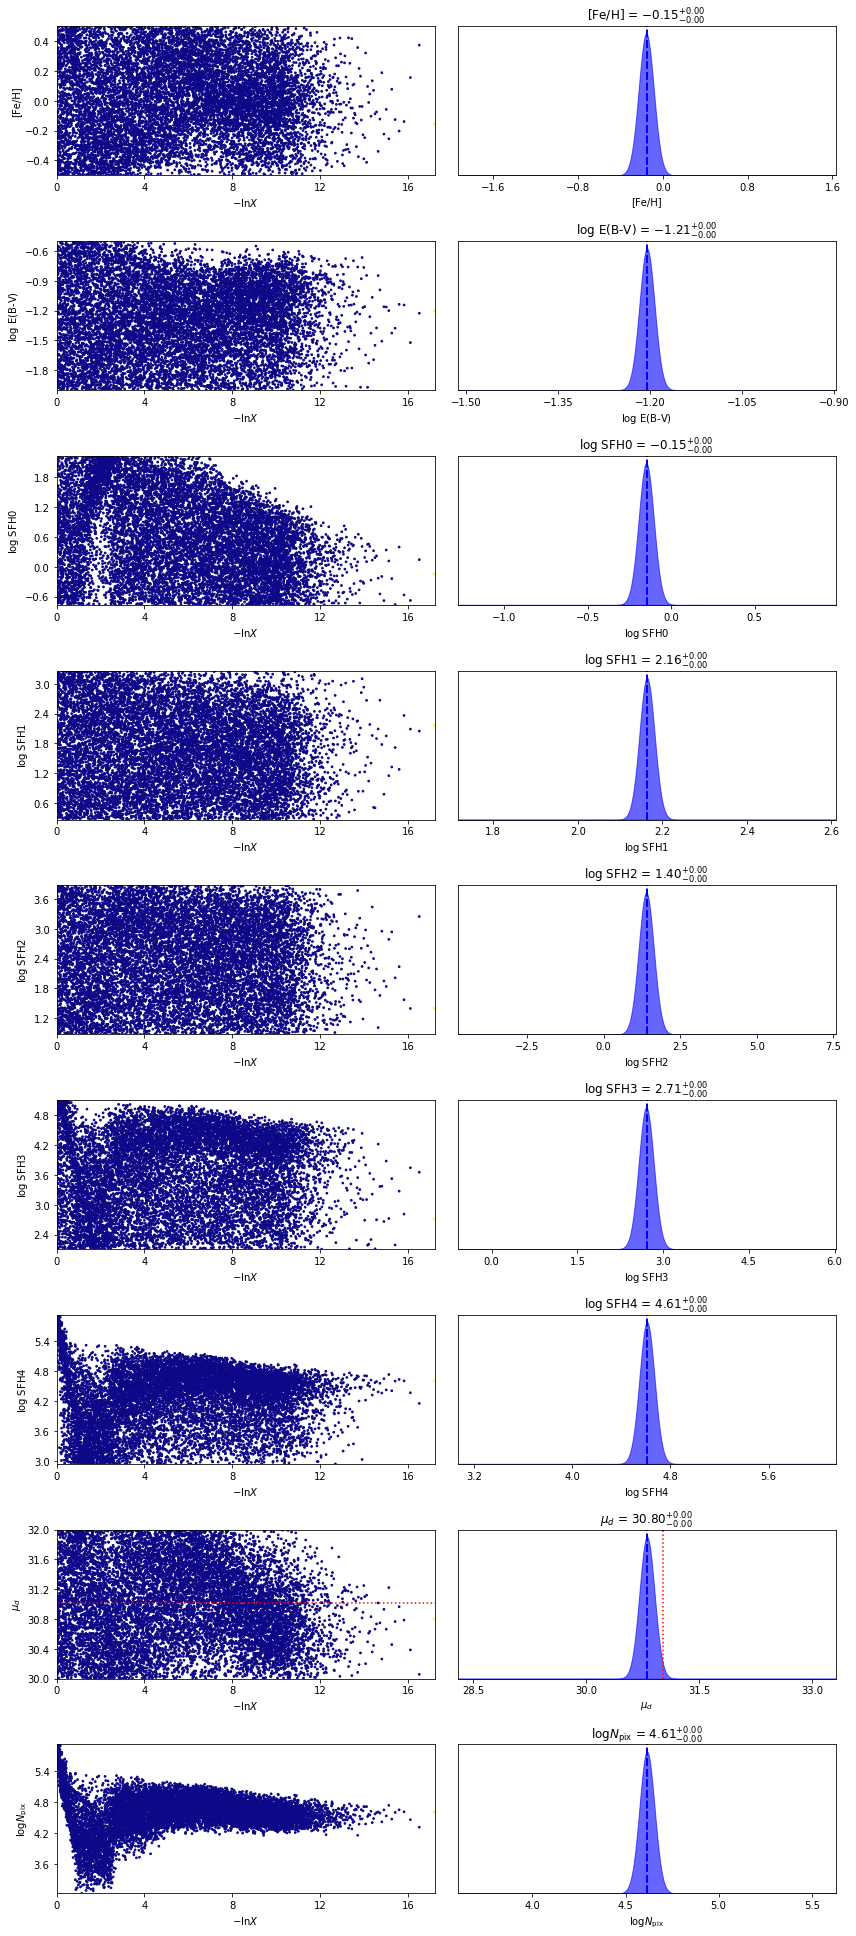

In [21]:
gal = 'M87'
fig, axes = res[f'{gal}_m2_r{regions[gal]}'].plot_trace();
axes[-2,0].axhline(y=dmods[gal], color='r', ls=':')
axes[-2,1].axvline(x=dmods[gal], color='r', ls=':')
plt.tight_layout()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

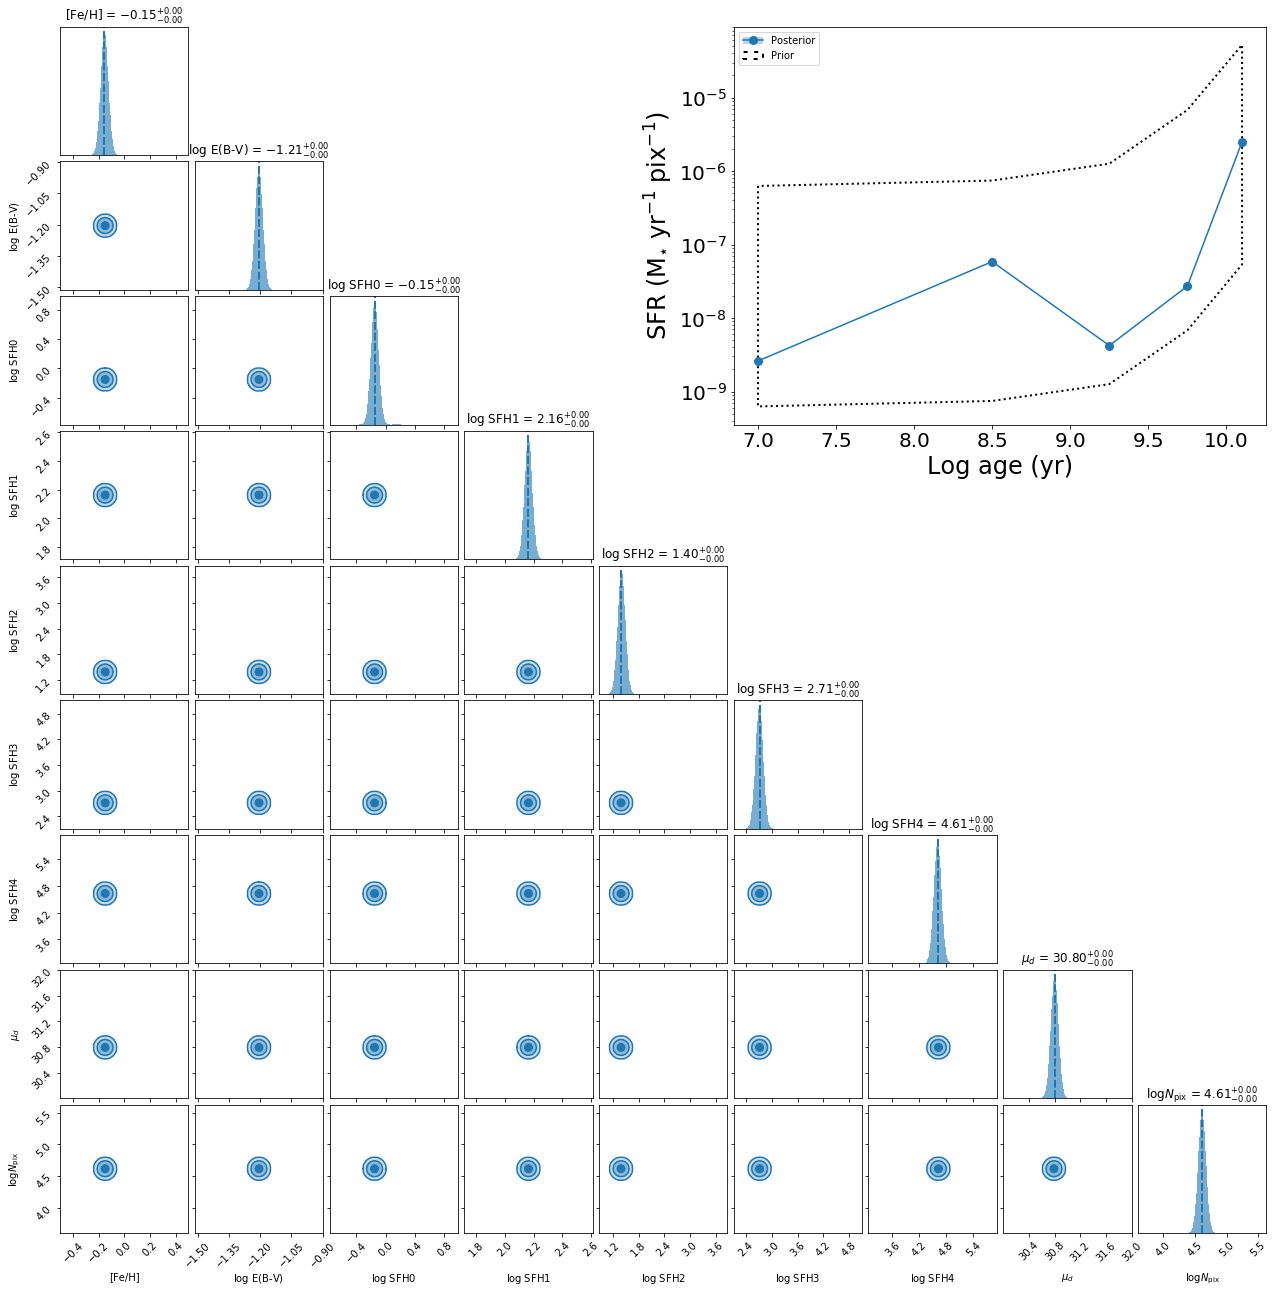

In [56]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'M87'
k = f'{gal}_m2_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=24)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=24)
plt.setp(axbig.get_xticklabels(), fontsize=20)
plt.setp(axbig.get_yticklabels(), fontsize=20)

In [48]:
f = ppy.instrument.default_m87_filters()
iso_model_M87 = ppy.isochrones.Isochrone_Model(f)

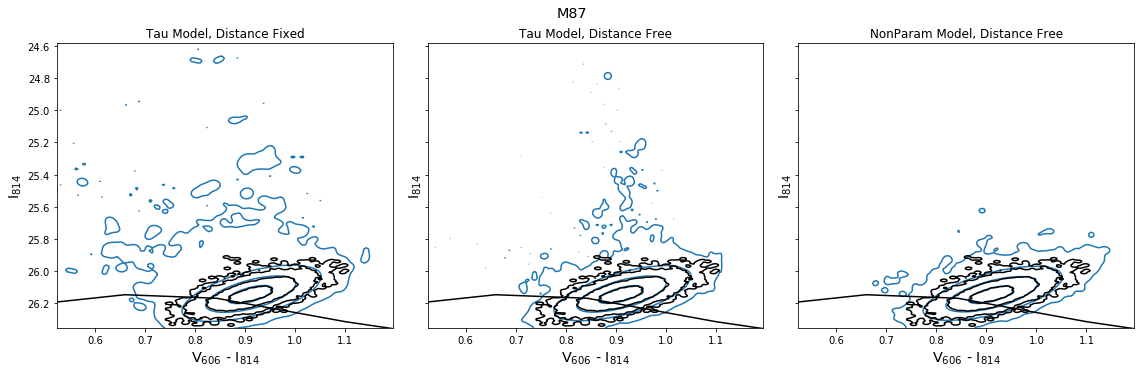

In [49]:
gal = 'M87'
fig, axes = plt.subplots(ncols=3, figsize=(16, 5), sharex=True, sharey=True)
for i in range(3):
    k = f'{gal}_m{i}_r{regions[gal]}'
    ppy.plotting.plot_pcmd_contours(pcmds[k], ax=axes[i])
for a in axes:
    ppy.plotting.plot_pcmd_contours(data[gal], ax=a, keep_limits=True, color='k')
    ppy.plotting.plot_isochrone(iso_model_M87, dmod=dmods[gal], axes=a)
axes[0].set_title('Tau Model, Distance Fixed')
axes[1].set_title('Tau Model, Distance Free')
axes[2].set_title('NonParam Model, Distance Free')
fig.suptitle(gal, y=0.99, fontsize='x-large', verticalalignment='bottom')
plt.tight_layout()

# M49

In [22]:
gal = 'M49'


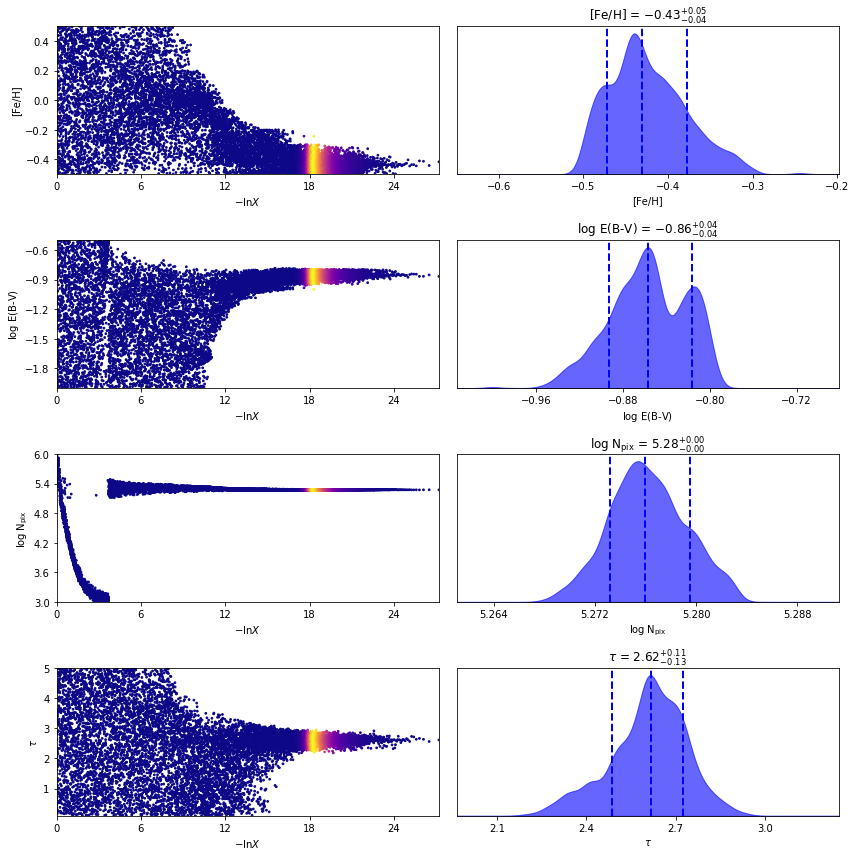

In [23]:
gal = 'M49'
fig, axes = res[f'{gal}_m0_r{regions[gal]}'].plot_trace();
plt.tight_layout()

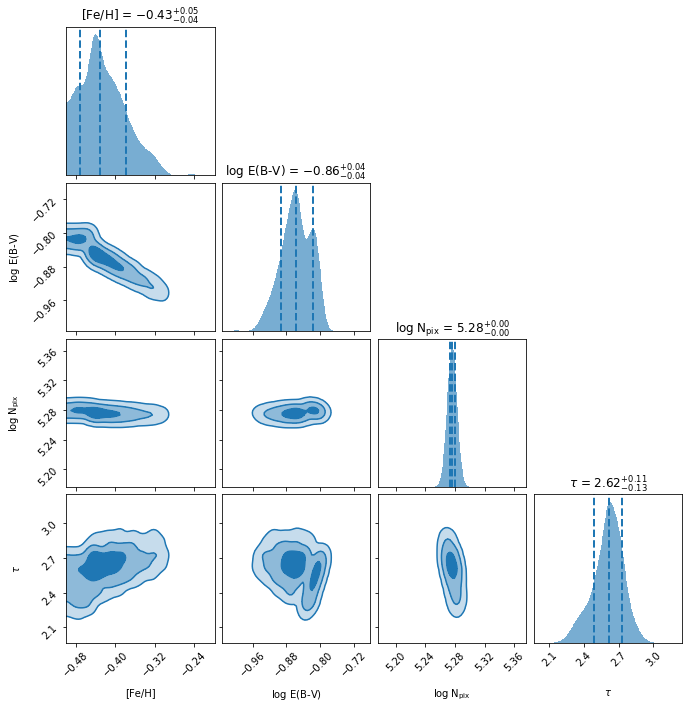

In [67]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'M49'
k = f'{gal}_m0_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)

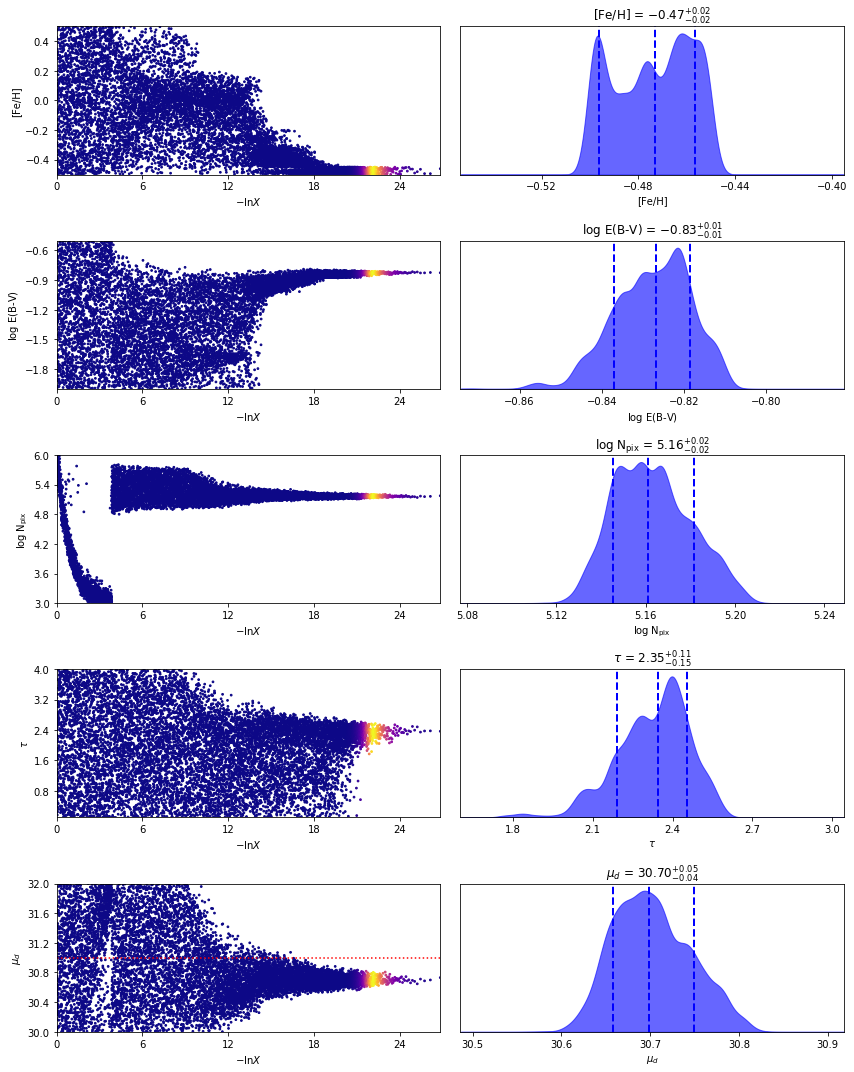

In [24]:
gal = 'M49'
fig, axes = res[f'{gal}_m1_r{regions[gal]}'].plot_trace();
axes[-1,0].axhline(y=dmods[gal], color='r', ls=':')
axes[-1,1].axvline(x=dmods[gal], color='r', ls=':')
plt.tight_layout()

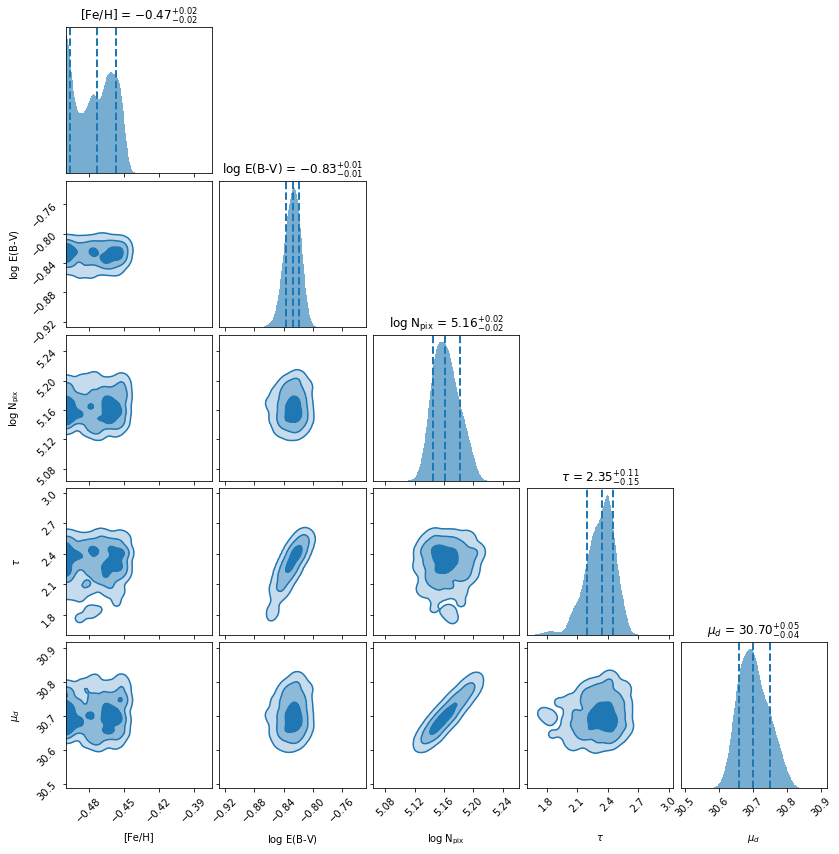

In [70]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'M49'
k = f'{gal}_m1_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(12, 12))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)

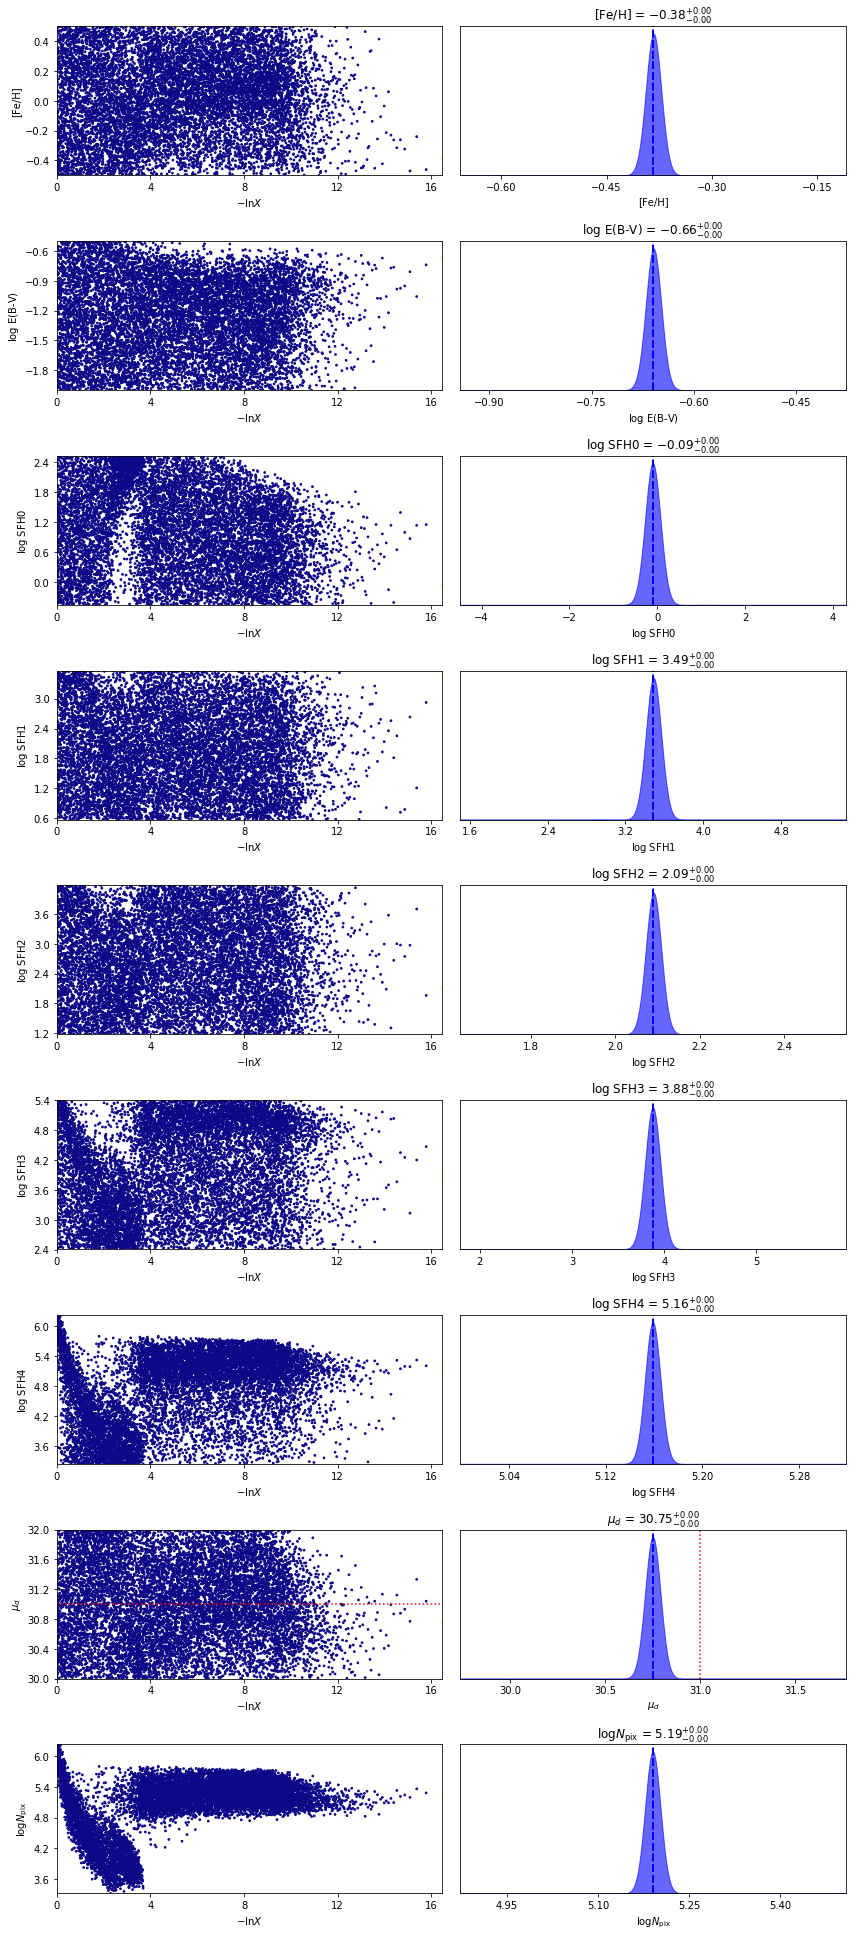

In [25]:
gal = 'M49'
fig, axes = res[f'{gal}_m2_r{regions[gal]}'].plot_trace();
axes[-2,0].axhline(y=dmods[gal], color='r', ls=':')
axes[-2,1].axvline(x=dmods[gal], color='r', ls=':')
plt.tight_layout()

In [ ]:
# %%savefig_dark_light paper1/Corner_tau.pdf
gal = 'M49'
k = f'{gal}_m2_r{regions[gal]}'
r = res[k]
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 5:])
_, lines = r.plot_sfr(ax=axbig, all_ages=False,
                      error_kwargs={'alpha': 0.})
axbig.set_ylabel(axbig.get_ylabel(), fontsize=24)
axbig.set_xlabel(axbig.get_xlabel(), fontsize=24)
plt.setp(axbig.get_xticklabels(), fontsize=20)
plt.setp(axbig.get_yticklabels(), fontsize=20)

In [46]:
f = ppy.instrument.default_m49_filters()
iso_model_M49 = ppy.isochrones.Isochrone_Model(f)

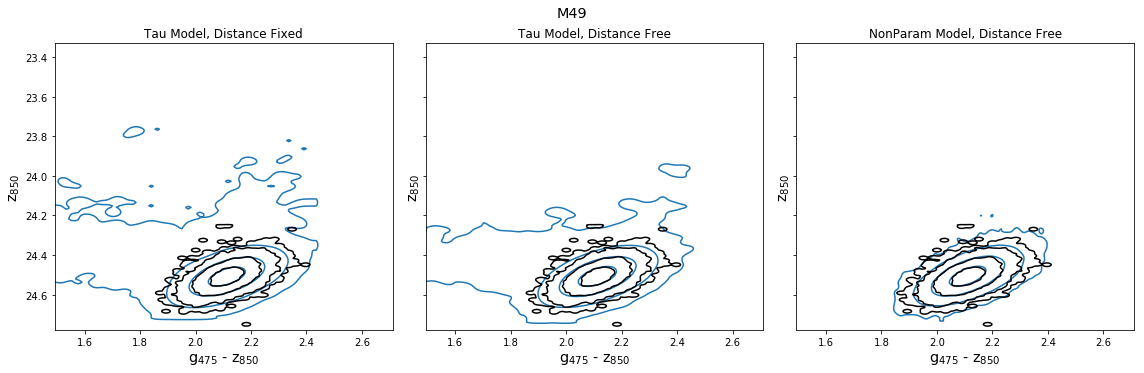

In [47]:
gal = 'M49'
fig, axes = plt.subplots(ncols=3, figsize=(16, 5), sharex=True, sharey=True)
for i in range(3):
    k = f'{gal}_m{i}_r{regions[gal]}'
    ppy.plotting.plot_pcmd_contours(pcmds[k], ax=axes[i])
for a in axes:
    ppy.plotting.plot_pcmd_contours(data[gal], ax=a, keep_limits=True, color='k')
    ppy.plotting.plot_isochrone(iso_model_M49, dmod=dmods[gal], axes=a)
axes[0].set_title('Tau Model, Distance Fixed')
axes[1].set_title('Tau Model, Distance Free')
axes[2].set_title('NonParam Model, Distance Free')
fig.suptitle(gal, y=0.99, fontsize='x-large', verticalalignment='bottom')
plt.tight_layout()